In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
grocery = pd.read_csv(r"C:\Users\azeem\Downloads\archive1\Supermart_Grocery_Sales-Retail_Analytics_Dataset.csv")

In [24]:
# Outliers for Sales
Q1 = grocery["Sales"].quantile(0.25)
Q3 = grocery["Sales"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

994.5


In [7]:
# Outliers for Profit
Q1 = grocery["Profit"].quantile(0.25)
Q3 = grocery["Profit"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

345.52000000000004


In [332]:
# Outliers for Discout 
outliers = (grocery["Discount"] < (Q1 - 1.5 * IQR)) | (grocery["Discount"] > (Q3 + 1.5 * IQR))
outliers.value_counts()
less = (grocery["Discount"] < (Q1 - 1.5 * IQR))
less.value_counts()
more = (grocery["Discount"] > (Q3 + 1.5 * IQR))
more.value_counts()

False    9995
Name: Discount, dtype: int64

In [333]:
# Displays the dataset
grocery

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254.000000,0.120000,401.280000,Tamil Nadu,2017.0
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.000000,0.180000,149.800000,Tamil Nadu,2017.0
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.000000,0.210000,165.200000,Tamil Nadu,2017.0
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.000000,0.250000,89.600000,Tamil Nadu,2016.0
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.000000,0.260000,918.450000,Tamil Nadu,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195.000000,0.260000,71.700000,Tamil Nadu,2015.0
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567.000000,0.160000,501.440000,Tamil Nadu,2017.0
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10-16-2018,West,1659.000000,0.150000,597.240000,Tamil Nadu,2018.0
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4-17-2018,West,1034.000000,0.280000,165.440000,Tamil Nadu,2018.0


In [189]:
# Displays the first 5 rows of the dataset
grocery.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [190]:
# Displays the number of rows and columns of the dataset
grocery.shape

(9994, 11)

In [191]:
# Prints information about the dataFrame
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [192]:
# Computes a summary of statistics pertaining to the DataFrame columns
grocery.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [193]:
# count the number of elements along a given axis
grocery.size

109934

In [194]:
# Computes a summary of statistics pertaining to the Sales DataFrame columns
grocery['Sales'].describe()

count    9994.000000
mean     1496.596158
std       577.559036
min       500.000000
25%      1000.000000
50%      1498.000000
75%      1994.750000
max      2500.000000
Name: Sales, dtype: float64

In [195]:
# Displays the sales value of first record 
grocery.Sales[1]

749

In [20]:
# Returns the position at the first occurrence of the specified value
grocery.index

RangeIndex(start=0, stop=9994, step=1)

In [68]:
# Access a group of rows and columns by label(s) or a boolean array
grocery.loc[4]

Order ID                     OD5
Customer Name            Ridhesh
Category             Food Grains
Sub Category     Organic Staples
City                        Ooty
Order Date            10-11-2016
Region                     South
Sales                       2355
Discount                    0.26
Profit                    918.45
State                 Tamil Nadu
Name: 4, dtype: object

In [67]:
# Select a specific row or column from the data set
grocery.iloc[1]

Order ID                   OD2
Customer Name            Sudha
Category             Beverages
Sub Category     Health Drinks
City               Krishnagiri
Order Date          11-08-2017
Region                   South
Sales                      749
Discount                  0.18
Profit                   149.8
State               Tamil Nadu
Name: 1, dtype: object

In [43]:
# Displays the grocery discount greater than 15%
grocery.Discount>0.15

0       False
1        True
2        True
3        True
4        True
        ...  
9989     True
9990     True
9991     True
9992    False
9993     True
Name: Discount, Length: 9994, dtype: bool

In [49]:
# Calculates the mean of grocery sales
grocery.Sales.mean()

1496.5961576946167

In [58]:
#Displays the grocery profit based on the below condition
grocery[(grocery.Profit>1000.45)|(grocery.Profit<200.15)]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9984,OD9985,Willams,Oil & Masala,Masalas,Trichy,8/31/2016,West,727,0.17,109.05,Tamil Nadu
9986,OD9987,Peer,Bakery,Biscuits,Vellore,05-08-2018,West,2199,0.34,153.93,Tamil Nadu
9987,OD9988,Ganesh,Fruits & Veggies,Fresh Vegetables,Theni,10/19/2015,West,1350,0.15,67.50,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu


In [315]:
#Displays the grocery profit based on the below condition
grocery[(grocery.Profit>100.45)&(grocery.Profit<200.15)]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.0,0.21,165.20,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847.0,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791.0,0.23,181.93,Tamil Nadu
15,OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,11-22-2016,Central,1440.0,0.11,100.80,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9969,OD9970,Yusuf,Bakery,Breads & Buns,Salem,08-09-2015,West,784.0,0.20,164.64,Tamil Nadu
9982,OD9983,Veronica,Fruits & Veggies,Organic Vegetables,Tenkasi,8-28-2018,West,1309.0,0.33,183.26,Tamil Nadu
9984,OD9985,Willams,Oil & Masala,Masalas,Trichy,8-31-2016,West,727.0,0.17,109.05,Tamil Nadu
9986,OD9987,Peer,Bakery,Biscuits,Vellore,05-08-2018,West,2199.0,0.34,153.93,Tamil Nadu


In [63]:
# Displays the list of all columns
grocery.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [69]:
# Displays the customer name column from the dataset
grocery['Customer Name']

0        Harish
1         Sudha
2       Hussain
3       Jackson
4       Ridhesh
         ...   
9989     Sudeep
9990       Alan
9991       Ravi
9992       Peer
9993     Ganesh
Name: Customer Name, Length: 9994, dtype: object

In [70]:
# Displays records between 5 to 20 from the dataset
grocery.loc[5:20]

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu
10,OD11,Ganesh,Snacks,Chocolates,Karur,06-09-2015,West,1903,0.13,437.69,Tamil Nadu
11,OD12,Yadav,"Eggs, Meat & Fish",Eggs,Namakkal,06-09-2015,West,701,0.10,308.44,Tamil Nadu
12,OD13,Sharon,Snacks,Cookies,Dindigul,4/15/2018,South,1659,0.19,315.21,Tamil Nadu
13,OD14,Peer,Fruits & Veggies,Fresh Vegetables,Kanyakumari,12-05-2017,West,1277,0.25,63.85,Tamil Nadu
14,OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,11/22/2016,Central,831,0.22,207.75,Tamil Nadu


In [72]:
# Displays the list of all cities between 5 to 20 from the dataset
grocery.loc[5:40,'City']

5         Dharmapuri
6             Trichy
7     Ramanadhapuram
8        Tirunelveli
9            Chennai
10             Karur
11          Namakkal
12          Dindigul
13       Kanyakumari
14       Kanyakumari
15       Krishnagiri
16        Dharmapuri
17              Bodi
18           Tenkasi
19       Kanyakumari
20           Vellore
21             Karur
22       Krishnagiri
23           Tenkasi
24              Ooty
25       Tirunelveli
26            Trichy
27        Viluppuram
28       Krishnagiri
29       Kanyakumari
30        Dharmapuri
31           Vellore
32            Trichy
33           Madurai
34           Vellore
35       Tirunelveli
36             Salem
37    Ramanadhapuram
38           Chennai
39            Cumbum
40          Namakkal
Name: City, dtype: object

In [8]:
# Drops 2nd and 3rd rows from the table
grocery.drop([2,3])

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [9]:
# Displays the customer name and State from the dataset
grocery[['Customer Name','State']]

,Customer Name,State
0,Harish,Tamil Nadu
1,Sudha,Tamil Nadu
2,Hussain,Tamil Nadu
3,Jackson,Tamil Nadu
4,Ridhesh,Tamil Nadu
...,...,...
9989,Sudeep,Tamil Nadu
9990,Alan,Tamil Nadu
9991,Ravi,Tamil Nadu
9992,Peer,Tamil Nadu


In [17]:
# Displays the sales by profit value from the table
grocery['Sales']/grocery['Profit']

0        3.125000
1        5.000000
2       14.285714
3       10.000000
4        2.564103
          ...    
9989     2.631579
9990    16.666667
9991     3.125000
9992     2.777778
9993     6.250000
Length: 9994, dtype: float64

In [21]:
grocery['Sales by Profit']=grocery['Sales']/grocery['Profit']

In [20]:
# Displays the Sales by Profit value from the table
grocery['Sales by Profit']

0        3.125000
1        5.000000
2       14.285714
3       10.000000
4        2.564103
          ...    
9989     2.631579
9990    16.666667
9991     3.125000
9992     2.777778
9993     6.250000
Name: Sales by Profit, Length: 9994, dtype: float64

In [24]:
# Detect missing values for an object
pd.isnull(np.nan)

True

In [25]:
# Detect missing values for an object
pd.isnull(None)

True

In [27]:
# Detect non missing values for an object
pd.notnull(None)

False

In [28]:
# Detect non missing values for an object
pd.notnull(np.nan)

False

In [31]:
# Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN , gets mapped to True values.
pd.isnull(pd.Series([1,np.nan,10]))

0    False
1     True
2    False
dtype: bool

In [32]:
# Return a boolean same-sized object indicating if the values are not NA. 
pd.notnull(pd.Series([1,np.nan,10]))

0     True
1    False
2     True
dtype: bool

In [35]:
# Return a boolean same-sized object indicating if the values are NA. 
grocery=pd.Series([1,2,3,np.nan,np.nan,4])

In [36]:
grocery

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [38]:
# Return a boolean same-sized object indicating if the values are not NA. 
pd.notnull(grocery)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [42]:
# Returns a boolean same-sized object indicating if the values are NA. 
pd.isnull(grocery)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [39]:
# Returns the number of elements with the specified value
pd.notnull(grocery).count()

6

In [40]:
# Adds up all the numerical values in an iterable
pd.notnull(grocery).sum()

4

In [45]:
# Detect non missing values for an object
grocery[grocery.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [316]:
# Removes the rows that contains NULL values
grocery.dropna()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254.0,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.0,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.0,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.0,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.0,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12-24-2015,West,945.0,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195.0,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567.0,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10-16-2018,West,1659.0,0.15,597.24,Tamil Nadu


In [317]:
# Finds the count of all NULL values in grocery table
grocery.isnull().sum()

Order ID         1
Customer Name    1
Category         1
Sub Category     1
City             1
Order Date       1
Region           1
Sales            0
Discount         0
Profit           0
State            1
dtype: int64

In [318]:
# Drops the rows with atleast 3 NULL values from the dataframe
grocery.dropna(thresh=3)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254.000000,0.120000,401.280000,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.000000,0.180000,149.800000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.000000,0.210000,165.200000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.000000,0.250000,89.600000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.000000,0.260000,918.450000,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195.000000,0.260000,71.700000,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567.000000,0.160000,501.440000,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10-16-2018,West,1659.000000,0.150000,597.240000,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4-17-2018,West,1034.000000,0.280000,165.440000,Tamil Nadu


In [319]:
# Replaces the NULL values with a specified value
grocery.fillna(0)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254.000000,0.120000,401.280000,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749.000000,0.180000,149.800000,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360.000000,0.210000,165.200000,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896.000000,0.250000,89.600000,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355.000000,0.260000,918.450000,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195.000000,0.260000,71.700000,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567.000000,0.160000,501.440000,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10-16-2018,West,1659.000000,0.150000,597.240000,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4-17-2018,West,1034.000000,0.280000,165.440000,Tamil Nadu


In [244]:
# Finds the unique cities from the table
grocery['City'].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar', nan],
      dtype=object)

In [17]:
# Finds the count of each city from the table
grocery['City'].value_counts()

Kanyakumari       459
Tirunelveli       446
Bodi              442
Krishnagiri       440
Vellore           435
Perambalur        434
Tenkasi           432
Chennai           432
Salem             431
Karur             430
Pudukottai        430
Coimbatore        428
Ramanadhapuram    421
Cumbum            417
Virudhunagar      416
Madurai           408
Ooty              404
Namakkal          403
Viluppuram        397
Dindigul          396
Theni             387
Dharmapuri        376
Nagercoil         373
Trichy            357
Name: City, dtype: int64

In [20]:
# Replaces values of below cities from the table
grocery['City'].replace({'Vellore':'Chennai','Krishnagiri':'Ooty'})

0           Chennai
1              Ooty
2        Perambalur
3        Dharmapuri
4              Ooty
           ...     
9989        Madurai
9990    Kanyakumari
9991           Bodi
9992     Pudukottai
9993    Tirunelveli
Name: City, Length: 9994, dtype: object

In [21]:
# Finds duplicates from the table
grocery.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [22]:
# duplicate rows except the last one is deleted
grocery.duplicated(keep='last')

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [23]:
# Removes duplicate rows based on a specific column
grocery.duplicated(subset=['Customer Name'])

0       False
1       False
2       False
3       False
4       False
        ...  
9989     True
9990     True
9991     True
9992     True
9993     True
Length: 9994, dtype: bool

In [24]:
# Removes duplicate rows based on a specific column except the last row
grocery.duplicated(subset=['Customer Name'], keep='last')

0        True
1        True
2        True
3        True
4        True
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [25]:
# Removes duplicates from the data frame
grocery.drop_duplicates()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [320]:
# splits values in the column based on the condition
grocery['Order Date'].str.split('-')

0       [11, 08, 2017]
1       [11, 08, 2017]
2       [06, 12, 2017]
3       [10, 11, 2016]
4       [10, 11, 2016]
             ...      
9990    [07, 12, 2015]
9991    [06, 06, 2017]
9992    [10, 16, 2018]
9993     [4, 17, 2018]
9994               NaN
Name: Order Date, Length: 9995, dtype: object

In [321]:
# Splits the values of the cell into separate columns in the table
grocery['Order Date'].str.split('-',expand=True)

,0,1,2
0,11,08,2017
1,11,08,2017
2,06,12,2017
3,10,11,2016
4,10,11,2016
...,...,...,...
9990,07,12,2015
9991,06,06,2017
9992,10,16,2018
9993,4,17,2018


In [37]:
# Finds the values which contains letter 'W' from region column in the dataframe
grocery['Region'].str.contains('W')

0       False
1       False
2        True
3       False
4       False
        ...  
9989     True
9990     True
9991     True
9992     True
9993     True
Name: Region, Length: 9994, dtype: bool

In [40]:
# Finds the values which contains letter 'e' from category column in the dataframe
grocery['Category'].str.contains('e')

0       False
1        True
2       False
3        True
4       False
        ...  
9989     True
9990     True
9991    False
9992    False
9993    False
Name: Category, Length: 9994, dtype: bool

In [36]:
# Remove spaces at the beginning and at the end of the string
grocery['Category'].str.strip()

0            Oil & Masala
1               Beverages
2             Food Grains
3        Fruits & Veggies
4             Food Grains
              ...        
9989    Eggs, Meat & Fish
9990               Bakery
9991          Food Grains
9992         Oil & Masala
9993          Food Grains
Name: Category, Length: 9994, dtype: object

In [42]:
# Replaces the column values based on the condition
grocery['Category'].str.replace('',' ')

0                  O i l   &   M a s a l a 
1                        B e v e r a g e s 
2                    F o o d   G r a i n s 
3          F r u i t s   &   V e g g i e s 
4                    F o o d   G r a i n s 
                       ...                 
9989     E g g s ,   M e a t   &   F i s h 
9990                           B a k e r y 
9991                 F o o d   G r a i n s 
9992               O i l   &   M a s a l a 
9993                 F o o d   G r a i n s 
Name: Category, Length: 9994, dtype: object

In [11]:
# Finds the correlation of each column in a DataFrame
grocery.corr()

,Sales,Discount,Profit
Sales,1.000000,-0.005512,0.605349
Discount,-0.005512,1.000000,0.000017
Profit,0.605349,0.000017,1.000000


In [199]:
values=np.random.randn(1000)
values2=np.linspace(min(values)-10, max(values)+10, 100)

In [200]:
N=50
x=np.random.rand(N)
y=np.random.rand(N)
colors=np.random.rand(N)
area=np.pi*(20*np.random.rand(N))**2

No handles with labels found to put in legend.


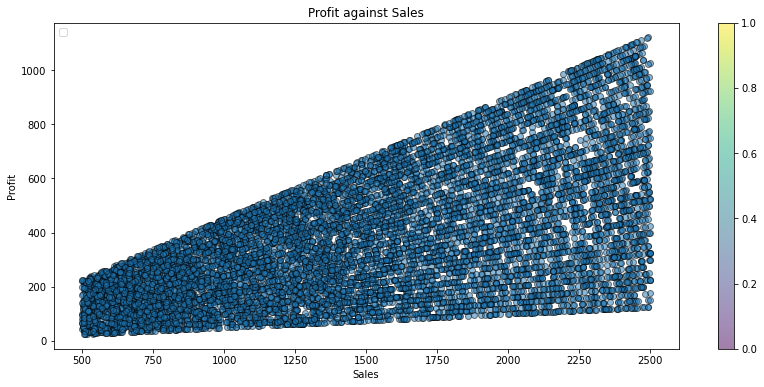

In [201]:
# This scatter plot showcases that the profit exponentially increases with Sales
a= grocery['Sales']
b= grocery['Profit']
plt.figure(figsize=(14,6))
plt.scatter(a, b, alpha=0.5, edgecolor = 'black')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Profit against Sales")
plt.legend(loc='upper left')
plt.colorbar()
plt.show()

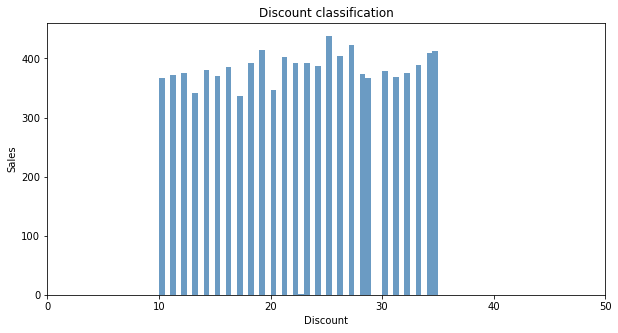

In [287]:
# This histogram shows the discount applied across various subcategories in the dataset
c = grocery['Discount']
d = c*100
plt.subplots(figsize=(10,5))
plt.hist(d, bins=50, alpha=0.8, linewidth = 10,
        histtype='bar', color='steelblue')
plt.xlim(xmin=0, xmax=50)
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Discount classification")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


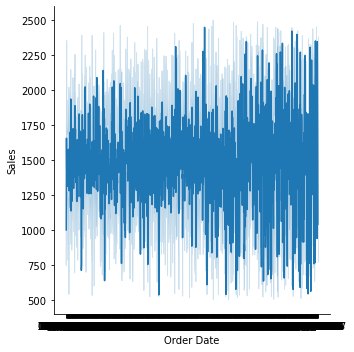

In [289]:
# Displays the sales made over a period of time
sns.relplot('Order Date', 'Sales', data=grocery, kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


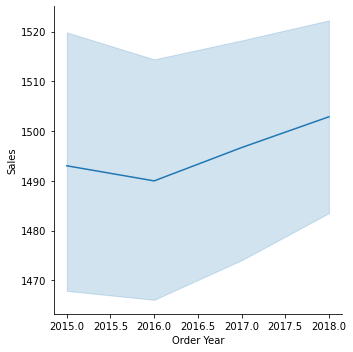

In [340]:
# Seaborn plot with confidence Interval (CI) depicting the Sales made against each year
sns.relplot('Order Year', 'Sales', data=grocery, kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


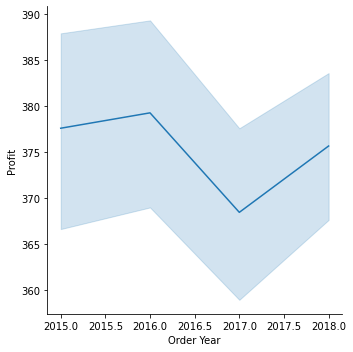

In [349]:
# Seaborn plot with confidence Interval (CI) depicting the Profits made against each year
sns.relplot('Order Year', 'Profit', data=grocery, kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


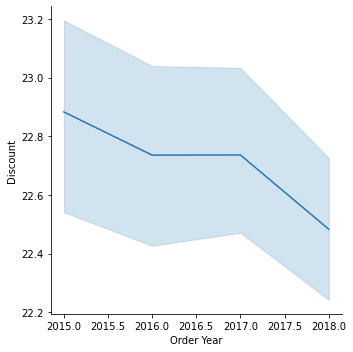

In [351]:
# Seaborn plot with confidence Interval (CI) depicting the discounts made against each year
sns.relplot('Order Year', d, data=grocery, kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


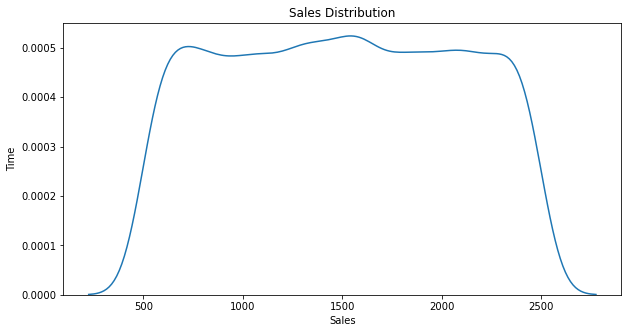

In [216]:
# Seaborn plot below displays the sales that were made across cities over a period of time
plt.figure(figsize=(10,5))
sns.distplot(a=grocery["Sales"],bins=20,hist=False)
plt.xlabel("Sales")
plt.ylabel("Time")
plt.title("Sales Distribution")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


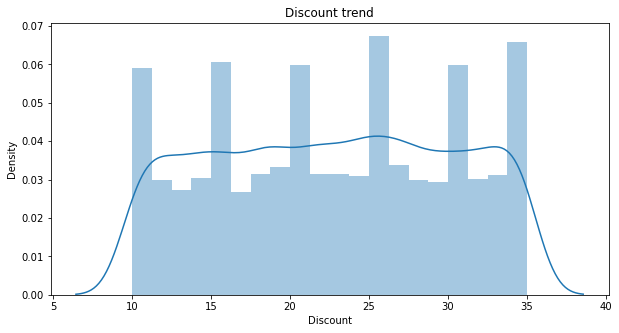

In [204]:
# Seaborn plot below displays the range of discouts applies across various cities over a period of time
plt.figure(figsize=(10,5))
sns.distplot(a=grocery["Discount"]*100, bins=20,hist=True)
plt.title("Discount trend")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


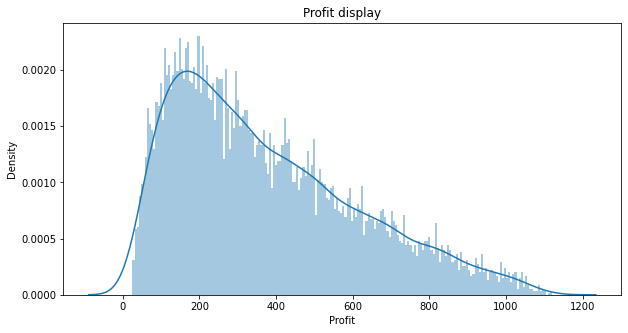

In [205]:
# Seaborn plot below displays the gained against various categories across cities
plt.figure(figsize=(10,5))
sns.distplot(a=grocery["Profit"],bins=200)
plt.title("Profit display")
plt.show()

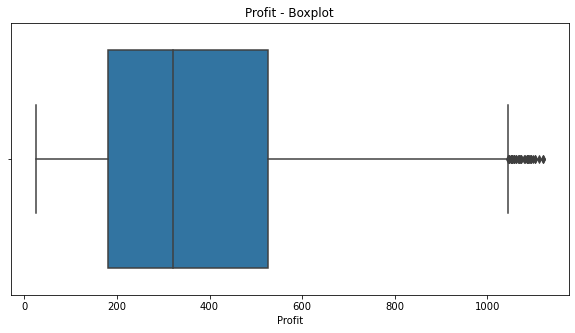

In [207]:
# # Showcases the boxplot for profit gained againt each category across various cities
plt.figure(figsize=(10,5))
sns.boxplot(x=grocery.Profit, data=grocery)
plt.title("Profit - Boxplot")
plt.show()

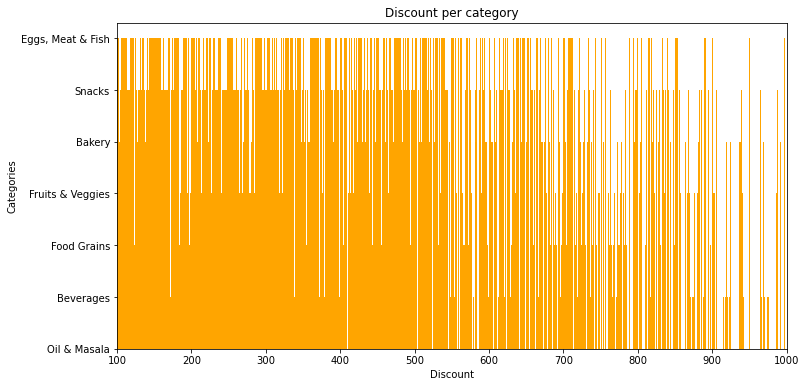

In [211]:
# Displays the discount applied across category
b = grocery['Profit']
c = grocery['Discount']
d = c*100
e = grocery['Category']
plt.subplots(figsize=(12,6))
plt.xlim(xmin=100, xmax=1000)
plt.xlabel("Discount")
plt.ylabel("Categories")
plt.title("Discount per category")
barWidth=0.3
plt.bar(b, e, width=barWidth, color='Orange')
plt.show()

Text(0.5, 1.0, 'Sales vs Profit')

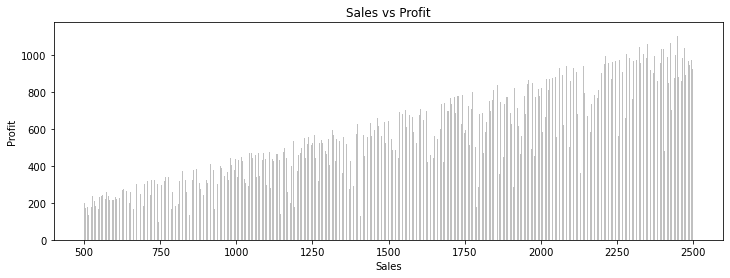

In [357]:
# Displays the Sales against Profit of groceries dataset
plt.figure(figsize=(12,4))
barWidth=0.5
plt.bar(a, b, width=barWidth, color='Silver', label='label Y')
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Sales vs Profit")

Text(0.5, 1.0, 'Sales - Histogram')

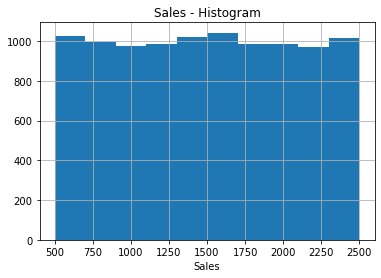

In [22]:
# Histogram of Sales
grocery.hist(column='Sales')
plt.xlabel("Sales")
plt.title("Sales - Histogram")

Text(0.5, 1.0, 'Profit - Histogram')

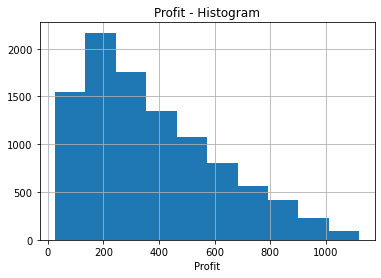

In [19]:
# Histogram of Profit
grocery.hist(column='Profit')
plt.xlabel("Profit")
plt.title("Profit - Histogram")